<h1>Chapter 3 | Data Exercise #2 | Used cars EDA | Distribution of variables</h1>

<p>2. Use the data on used cars collected from a classified ads site (according to Chapter 1 data exercise).</p>
<p>Assignments:</p>
<ul>
    <li>Visualize the distribution of price and the distribution of age, and compute their summary statistics.</li>
    <li>Are there extreme values? What would you do with them? Describe the two distributions in a few sentences.</li>
</ul>
<h2><b>1.</b> Load the data</h2>
<p>The data collection and cleaning steps were done in previous chapters (check data exercises for chapter  1 and 2). I will just store a copy of the cleaned dataset in this repository in case anyone wants to use it.</p>

In [171]:
import os
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [172]:
# Increase number of returned rows in pandas
pd.set_option("display.max_rows", 500)

In [173]:
# Current script folder
dirname = os.getcwd()

# Get location folders
data_in = f"{dirname}/data/raw/"
data_out = f"{dirname}/data/clean/"
output = dirname

In [174]:
used_cars = pd.read_csv(f"{data_in}WS_car_prices.csv")

In [175]:
used_cars.head()

,car_model,car_price,date,time,total_mileage,year,gear_type,fuel_type,url,city,area
0,Vendo HB20 2015,50000.0,2023-03-07,16:40,88000.0,2015,Manual,Flex,https://rs.olx.com.br/regioes-de-porto-alegre-...,Cachoeirinha,Chácara das Rosas
1,HYUNDAI HB20 2019/2020 1.0 12V FLEX VISION MANUAL,59900.0,2023-03-07,16:37,91007.0,2020,Manual,Flex,https://rs.olx.com.br/regioes-de-porto-alegre-...,Canoas,Marechal Rondon
2,Hyundai Hb20 1.0 12v Comfort,89690.0,2023-03-07,16:16,0.0,2023,Manual,Flex,https://rs.olx.com.br/regioes-de-caxias-do-sul...,Caxias do Sul,Nossa Senhora de Fátima
3,HB20 Evolution 1.0 Unico Dono 18000km,74900.0,2023-03-07,16:07,18000.0,2021,Manual,Flex,https://rs.olx.com.br/regioes-de-caxias-do-sul...,Getúlio Vargas,Nossa Senhora de Fátima
4,Hyundai Hb20 2022 1.0 tgdi flex evolution auto...,83900.0,2023-03-07,15:59,49790.0,2022,Automático,Flex,https://rs.olx.com.br/regioes-de-porto-alegre-...,Porto Alegre,Navegantes


<h2>2. Explore the data</h2>
<h3>2.1 Describing distributions | Price</h3>
<h4>2.1.1 Compute the summary statistics</h4>


In [176]:
def bowley_skewness(data):
    mean = data.mean()
    median = data.median()
    std = data.std()
    return (mean - median) / std

In [177]:
def summary_statistics(data):
    summary_statistics = {
    "summary_statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        data.mean(),
        data.median(),
        data.mode().iloc[0],
        data.min(),
        data.max(),
        data.quantile(0.75) - data.quantile(0.25),
        data.quantile(0.25),
        data.quantile(0.75),
        bowley_skewness(data),
        data.std(),
        data.count(),
    ],
    }
    return pd.DataFrame.from_dict(summary_statistics).round(1)

In [178]:
summary_table_price = summary_statistics(used_cars["car_price"])
summary_table_price

,summary_statistics,Value
0,Mean,315797.5
1,Median,55900.0
2,Mode,54900.0
3,Min,0.0
4,Max,82500000.0
5,IQR,16115.0
6,25th percentile,49875.0
7,75th percentile,65990.0
8,Skewness,0.1
9,Standard deviation,4060510.4


<p>We can stop right now and identify our main problem - we have at least one extreme value in our dataset, which is obviously an error. We can see that when comparing the statistics that are robust to extreme values. For instance, our median is 55,900brl, our mode, 54,900brl, and the 25th and the 75th percentile, between 49,875 and 65,990brl. Also, a car for <b>free</b> (0brl)? I don't think so.  Let's take a quick look at the distribution of this dataset.</p>

{'whiskers': [<matplotlib.lines.Line2D at 0x26e8d504d30>,
 'caps': [<matplotlib.lines.Line2D at 0x26e8d505270>,
 'boxes': [<matplotlib.patches.PathPatch at 0x26e8d504a30>],
 'medians': [<matplotlib.lines.Line2D at 0x26e8d5057b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26e8d505a50>],
 'means': []}

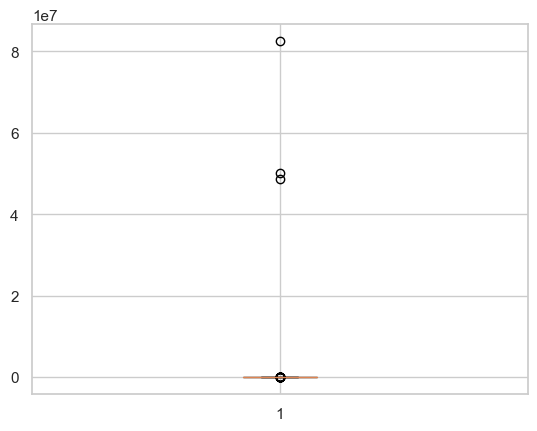

In [179]:
plt.boxplot(used_cars["car_price"], vert=True, patch_artist=True)


<p>We can see that our dataset has some 3 extremely large values. Since we are definetly sure that no one will charge 200,000brl for an HB20, we can set this value and filter and see if we got rid of our extreme values. We can apply the same logic to min values - no one will charge less than 10,000brl (and that's a very conservative value). Finally, because we are looking for used cars, let's make sure none of them are brand new and consider only cars with a total mileage higher than 0km.</p>

In [180]:
used_cars_cut = used_cars.loc[
    (used_cars["car_price"] <= 200_000) &
    (used_cars["car_price"] > 10_000) &
    (used_cars["total_mileage"] > 0)
]

{'whiskers': [<matplotlib.lines.Line2D at 0x26e8c7d1840>,
 'caps': [<matplotlib.lines.Line2D at 0x26e8c7d1d80>,
 'boxes': [<matplotlib.patches.PathPatch at 0x26e8c7d14b0>],
 'medians': [<matplotlib.lines.Line2D at 0x26e8c7d21d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26e8c7d2470>],
 'means': []}

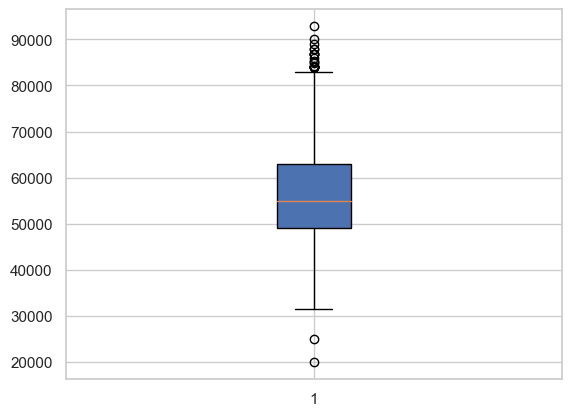

In [181]:
plt.boxplot(used_cars_cut["car_price"], vert=True, patch_artist=True)

<p>Ahhh there you go! We can now plot our summary statistics once again.</p>

In [182]:
summary_statistics(used_cars_cut["car_price"])

,summary_statistics,Value
0,Mean,57023.0
1,Median,55000.0
2,Mode,54900.0
3,Min,20000.0
4,Max,92900.0
5,IQR,13922.5
6,25th percentile,49000.0
7,75th percentile,62922.5
8,Skewness,0.2
9,Standard deviation,11076.1


<p>What can we say about these statistics?</p>
<ul>
<li>The mean is <b>57,023</b>, the median, <b>55,000</b>, and the mode, <b>54,900</b>. Because the mean is higher than the median, we can expect a skewed distribution, with a right tail.</li>
<li>There is a big price range. We have a minimum value of <b>20,000</b> and max value of <b>92,990</b>, which leads to a range of 78,990. We have very cheap and very expensive car prices.</li>
<li>The 25th percetile is <b>49,900</b>, while the 75th percentile is <b>62,922</b>, and the IQR is <b>13,922</b>, which means that 50% of our car prices falls within a range of 13,922.</li>
<li>The standard deviation is <b>11,076</b>, which shows that there might be some dispersion in our data. As such, we can expect that at any given car, thinking about its mean price, we can expect significant differences.</li>
<li>The skewness is positive , which shows that the mean is higher than the median. As such, we have some skew to the right, indicating some extreme values above the mean.</li>
</ul>
<p>We can now plot the histogram of the distribution of these prices.</p>



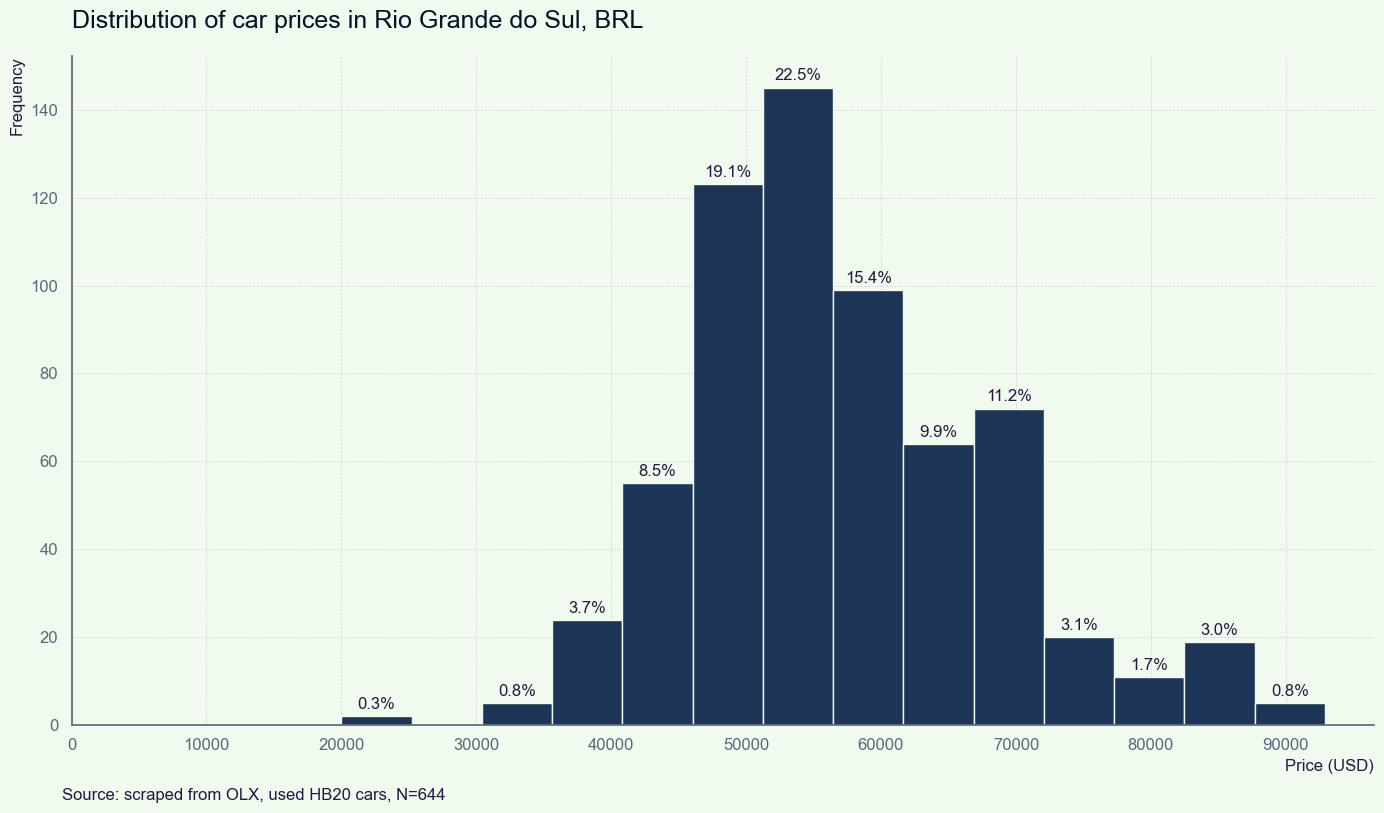

In [183]:
# Visualize the distribution of price, no filters
# Set the bin width
bin_width = 5000
n_bins = int((used_cars_cut["car_price"].max() - used_cars_cut["car_price"].min())/ bin_width)
# Create a new figure with adjusted padding
plt.figure(figsize=(14, 8), facecolor="#f1faee")
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)
ax = plt.subplot(1,1, 1, facecolor="#f1faee")


# Plot the histogram
n, bins, patches = plt.hist(
        used_cars_cut["car_price"], 
        bins=n_bins,
        color="#1d3557",
        edgecolor="#f1faee", 
        zorder=2)

# Set x and y axis labels
plt.xlabel("Price (USD)",
            fontsize=12, 
            color="#231942",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=12,
            color="#231942", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
xticks_range = range(0, 100000, 10000)
plt.xticks(xticks_range, fontsize=12, color="#231942")
plt.yticks(fontsize=12, color="#231942")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = used_cars_cut["car_price"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=12, color="#231942")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of car prices in Rio Grande do Sul, BRL",
          fontsize=18, 
          loc="left",
          color="#001427",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

# Add caption text below the chart
caption_text = f"Source: scraped from OLX, used HB20 cars, N={round(used_cars_cut['car_price'].count())}"

plt.figtext(0.05, -0.01, caption_text, ha="left", fontsize=12, color="#231942", fontdict={"fontname": "Arial"})

plt.tight_layout()
plt.show()

<p>As we can see, the distribution of car prices follow a somewhat normal distribution, with some skew to the right. The mode is located in the bin between 50,000 - 55,000, which confirms our summary statistics. Even after removing some extreme values, a few high prices remained - we'll leave them for now, as we want to observe the distribution of cars by year as well.</p>
<h3><b>Remarks on extreme values</b>:</h3>
<ul>
<li>There were extreme values on both ends of the dataset. They were defined as <b>errors</b>, being either absurdly expensive or representing a free offer, with a price of 0.</li>
<li>Some prices were not errors, yet they were too high for a used cars. After removing observations with a total mileage of 0km (meaning they were new), we removed such values.</li>
</ul>
<h3><b>Remarks on the distribution of car prices</b>:</h3>
<ul>
<li>After removing the extreme values, our distribution presents a right tail - but nothing too skewed. Most of our values fall within the 49k - 62k range, which means we could probably look for a good deal in this price interval.</li>
</ul>
<p>Let's take a look at the distribution of age.</p>
<h3>2.2 Describing distributions | Age</h3>
<h4>2.2.1 Compute the summary statistics</h4>


In [184]:
summmary_table_age = summary_statistics(used_cars["year"])
summmary_table_age

,summary_statistics,Value
0,Mean,2017.7
1,Median,2018.0
2,Mode,2019.0
3,Min,2012.0
4,Max,2023.0
5,IQR,5.0
6,25th percentile,2015.0
7,75th percentile,2020.0
8,Skewness,-0.1
9,Standard deviation,2.9


<p>Initial observations:</p>
<ul>
<li>The mean is <b>2017.8</b>, so at any randomly selected car, you can expect a car that is nearly <b>5</b> years old. The median is <b>2018</b>, while our most frequent observation, the mode, is <b>2019</b>.</li>
<li>We have a range of more than <b>10 years</b>. The min is <b>2012</b>, while the max is <b>2023</b>. 50% of our observations fall within the range between <b>2015</b> and <b>2020</b>, with an IRQ of <b>5</b> years.</li>
<li>The standard deviation is <b>2.9</b>, which means we can expect a deviation of 3 years from our mean - 2017.7. </li>
<li>The skewness is negative, which means that our mean is lower than the median and as such, we can expect some skewness to the left of the distribution.</li>
</ul>
<p>Having said that, let's visualize the distribution without any filters. We'll add them later on and see the difference.</p>

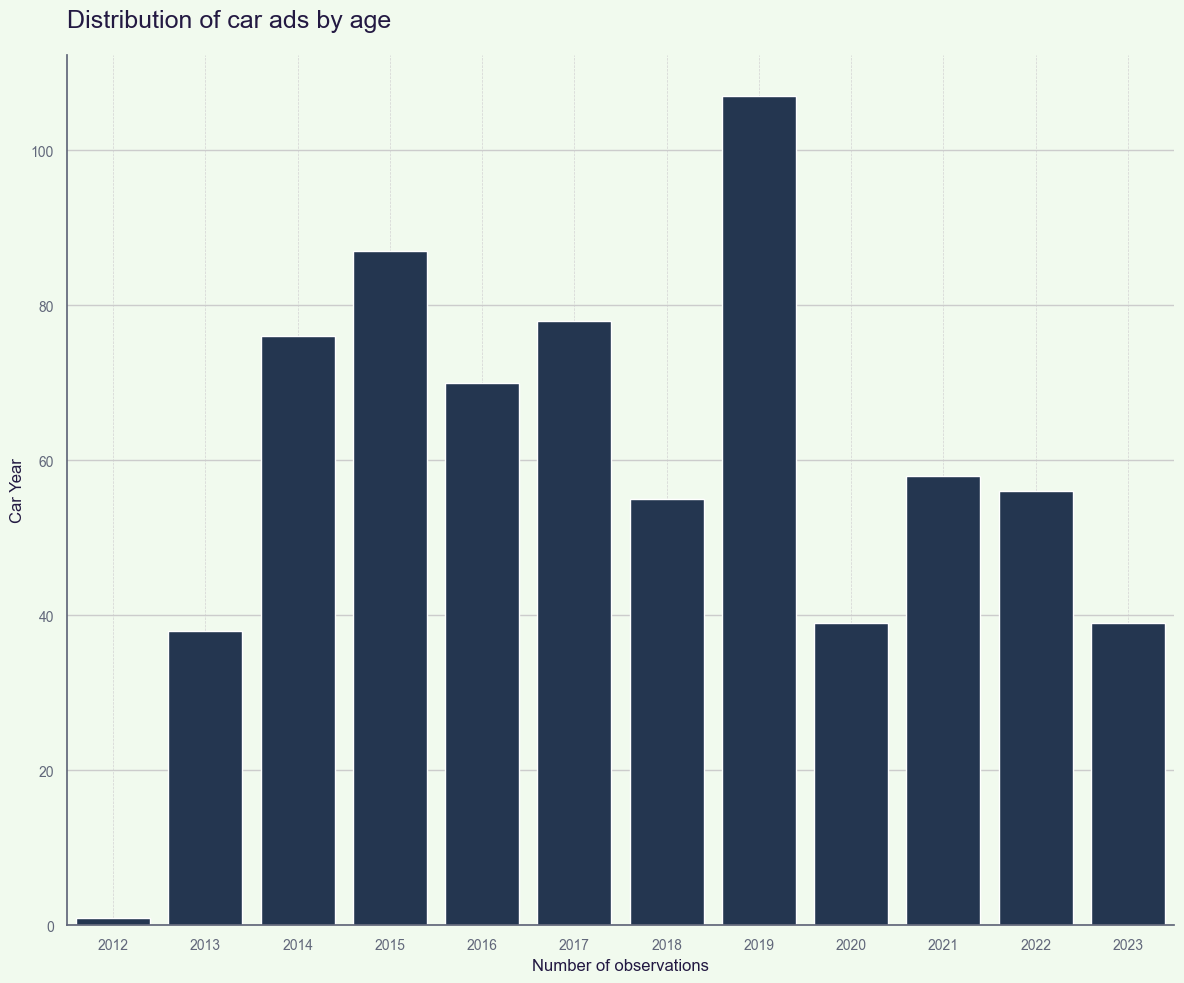

In [185]:
# Count the number of observations for each year
year_counts = used_cars["year"].value_counts().sort_index()

# Set the background color of the figure
plt.figure(
    figsize=(12, 10),
    facecolor="#f1faee"
    )

# Create a horizontal bar plot using sns
ax = sns.countplot(
    x="year",
    data=used_cars,
    color="#1d3557"
    )



# Set the facecolor of the axes to match the background color
ax.set_facecolor('#f1faee')

# Customize the plot
plt.xlabel("Number of observations", fontsize=12, color="#231942")
plt.ylabel("Car Year", fontsize=12, color="#231942")
plt.title("Distribution of car ads by age", fontsize=18, color="#231942", pad=20, loc="left")
plt.xticks(fontsize=10, color="#61677A")
plt.yticks(fontsize=10, color="#61677A")
ax.tick_params(axis="both", color="#61677A")
plt.grid(axis="x", linestyle="--", linewidth=0.5, color="lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>As we can see, our dataset is weirdly distributed. The mode is 2019, and it is skewed to the left.</p>
<p>Now, let's apply our filters. We will remove the extreme prices that we have found and exclude cars with no mileage. Let's create the summary statistics first.</p>

In [186]:
summmary_table_age

,summary_statistics,Value
0,Mean,2017.7
1,Median,2018.0
2,Mode,2019.0
3,Min,2012.0
4,Max,2023.0
5,IQR,5.0
6,25th percentile,2015.0
7,75th percentile,2020.0
8,Skewness,-0.1
9,Standard deviation,2.9


In [187]:
summmary_table_age_cut = summary_statistics(used_cars_cut["year"])
summmary_table_age_cut

,summary_statistics,Value
0,Mean,2017.4
1,Median,2017.0
2,Mode,2019.0
3,Min,2012.0
4,Max,2023.0
5,IQR,4.0
6,25th percentile,2015.0
7,75th percentile,2019.0
8,Skewness,0.2
9,Standard deviation,2.7


<p>We can notice a few differences.</p>
<ul>
<li>While the mean changed only for 0.3yr, the median changed from 2018 to <b>2017</b>. The mode remained the same,<b>2019</b>.</li>
<li>The range remained the same, but not its distribution. The 25th remained as <b>2015</b>, while the 75th decreased to <b>2019</b>. This means that 50% of our dataset is concentred in a narrower gapm which is represented by a lower IQR of <b>4</b>.</li>
<li>The standard deviation is also lower. We can expect a <b>2.7</b>year difference from the mean.</li>
<li>Remarkably, the skewness of the data changed. Now, we have some <b>positive</b> skew - we may have some extreme values to the right of the median, as the mean now is higher than the median (albeit for a small value).</li>
</ul>
<p>We can now visualize the changes in this distribution.</p>

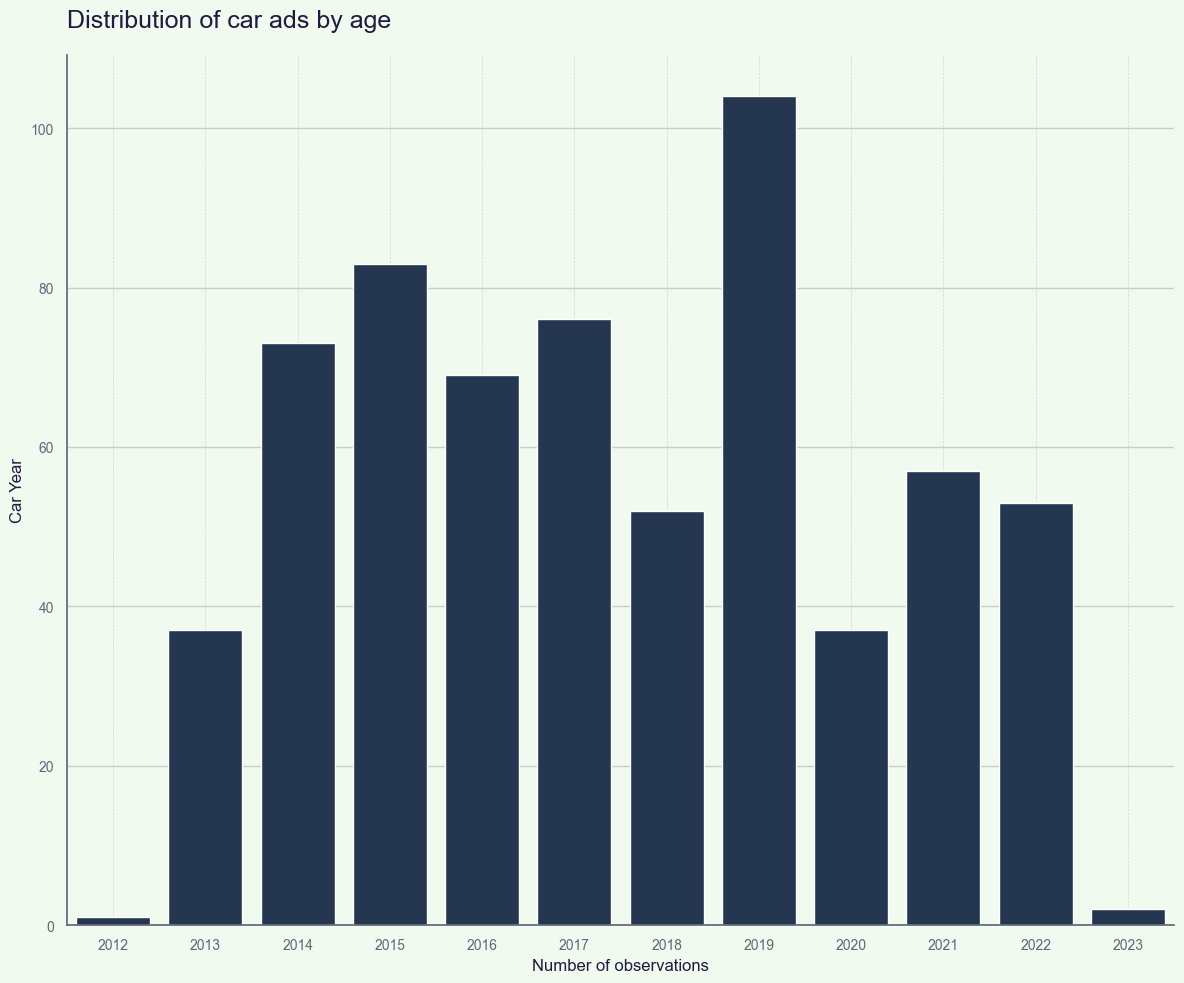

In [189]:
# Set the background color of the figure
plt.figure(
    figsize=(12, 10),
    facecolor="#f1faee"
    )

# Create a horizontal bar plot using sns
ax = sns.countplot(
    x="year",
    data=used_cars_cut,
    color="#1d3557"
    )



# Set the facecolor of the axes to match the background color
ax.set_facecolor('#f1faee')

# Customize the plot
plt.xlabel("Number of observations", fontsize=12, color="#231942")
plt.ylabel("Car Year", fontsize=12, color="#231942")
plt.title("Distribution of car ads by age", fontsize=18, color="#231942", pad=20, loc="left")
plt.xticks(fontsize=10, color="#61677A")
plt.yticks(fontsize=10, color="#61677A")
ax.tick_params(axis="both", color="#61677A")
plt.grid(axis="x", linestyle="--", linewidth=0.5, color="lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>As we can see, we are dealing with a weird distribution. It if weren't for the year of 2019, the right tail would look more visible, but as our statistics show, our data is indeed skewed to the right. Even after removing some extreme values, the shape of the dataset did not change as significantly as in the case of prices.</p>
<h3><b>Remarks on extreme values</b>:</h3>
<ul>
<li>There were no errors in terms of typos or any value that did not represent an actual year. As such, no observation was removed</li>
<li>Some years such as 2012 and 2023 are indeed extreme, but while the former surely represents a used car, the latter could also be used too - there could be used cars from 2023 with a very low mileage.</li>
<li>After filtering the data, cars with a year of 2023 remained, which reinforces our assumption.</li>
</ul>
<h3><b>Remarks on the distribution of car prices</b>:</h3>
<ul>
<li>After removing the extreme values, our distribution presents a right tail with very high mode in terms of year and number of observations. Most of our values fall within the 2015-2019 range, which means we could probably look for a good deal in this year interval.</li>
</ul>
<h2><b>3</b>. Summarizing the changes | table </h2>
<p>This was a very interesting data exploration. To visualize what we have done, let's create a table that summarizes our statistics and show the difference in percentage points between the original datasets and the filtered ones for our two variables.</p>


In [ ]:
# Calculate percentage difference between two values
def calculate_percentage_difference(initial, current):
    return ((current - initial) / initial) * 100

stats_filtered_dist_years = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
      "Initial_car_price": [
        used_cars["car_price"].mean(),
        used_cars["car_price"].median(),
        used_cars["car_price"].mode().iloc[0],
        used_cars["car_price"].min(),
        used_cars["car_price"].max(),
        used_cars["car_price"].quantile(0.75) - used_cars["car_price"].quantile(0.25),
        used_cars["car_price"].quantile(0.25),
        used_cars["car_price"].quantile(0.75),
        bowley_skewness(used_cars["car_price"]),
        used_cars["car_price"].std(),
        used_cars["car_price"].count(),
    ],
    "car_price": [
        used_cars_cut["car_price"].mean(),
        used_cars_cut["car_price"].median(),
        used_cars_cut["car_price"].mode().iloc[0],
        used_cars_cut["car_price"].min(),
        used_cars_cut["car_price"].max(),
        used_cars_cut["car_price"].quantile(0.75) - used_cars_cut["car_price"].quantile(0.25),
        used_cars_cut["car_price"].quantile(0.25),
        used_cars_cut["car_price"].quantile(0.75),
        bowley_skewness(used_cars_cut["car_price"]),
        used_cars_cut["car_price"].std(),
        used_cars_cut["car_price"].count(),
    ],
     "Initial_year": [
        used_cars["year"].mean(),
        used_cars["year"].median(),
        used_cars["year"].mode().iloc[0],
        used_cars["year"].min(),
        used_cars["year"].max(),
        used_cars["year"].quantile(0.75) - used_cars["year"].quantile(0.25),
        used_cars["year"].quantile(0.25),
        used_cars["year"].quantile(0.75),
        bowley_skewness(used_cars["year"]),
        used_cars["year"].std(),
        used_cars["year"].count(),
    ],
    "year": [
        used_cars_cut["year"].mean(),
        used_cars_cut["year"].median(),
        used_cars_cut["year"].mode().iloc[0],
        used_cars_cut["year"].min(),
        used_cars_cut["year"].max(),
        used_cars_cut["year"].quantile(0.75) - used_cars_cut["year"].quantile(0.25),
        used_cars_cut["year"].quantile(0.25),
        used_cars_cut["year"].quantile(0.75),
        bowley_skewness(used_cars_cut["year"]),
        used_cars_cut["year"].std(),
        used_cars_cut["year"].count(),
    ],
}

summary_table_dist_years = pd.DataFrame.from_dict(stats_filtered_dist_years).round(1)


# Calculate percentage differences
summary_table_dist_years["%_year_chg"] = calculate_percentage_difference(summary_table_dist_years["Initial_year"], summary_table_dist_years["year"]).round(2)
summary_table_dist_years["%_price_chg"] = calculate_percentage_difference(summary_table_dist_years["Initial_car_price"], summary_table_dist_years["car_price"]).round(2)

column_order = [
    "Statistics", "Initial_car_price", "car_price", "%_price_chg",
    "Initial_year", "year", "%_year_chg"
]
summary_table_dist_years = summary_table_dist_years[column_order]
summary_table_dist_years

,Statistics,Initial_car_price,car_price,%_price_chg,Initial_year,year,%_year_chg
0,Mean,315797.5,57023.0,-81.94,2017.7,2017.4,-0.01
1,Median,55900.0,55000.0,-1.61,2018.0,2017.0,-0.05
2,Mode,54900.0,54900.0,0.00,2019.0,2019.0,0.00
3,Min,0.0,20000.0,inf,2012.0,2012.0,0.00
4,Max,82500000.0,92900.0,-99.89,2023.0,2023.0,0.00
5,IQR,16115.0,13922.5,-13.61,5.0,4.0,-20.00
6,25th percentile,49875.0,49000.0,-1.75,2015.0,2015.0,0.00
7,75th percentile,65990.0,62922.5,-4.65,2020.0,2019.0,-0.05
8,Skewness,0.1,0.2,100.00,-0.1,0.2,-300.00
9,Standard deviation,4060510.4,11076.1,-99.73,2.9,2.7,-6.90


<p>Now that is a relevant table! Let's make the final comments:</p>
<ul>
<li>The mean of both variables changed. Remarkably, the mean for car prices decreased by 82%, while for year, by 01%.</li>
<li>Both median statistics also decreased, most probably due to the reduction of the dataset size.</li>
<li>The mode for both variables did not change.</li>
<li>The range changed a lot for car prices. This behavior reflects the removal of extreme values on both sides of the dataset.</li>
<li>The IQR, in both cases, was reduced. This implies that a big portion of our sample is now more concentrated in a smaller range.</li>
<li>The changes in the standard deviation were also significant, specially regarding car prices, which decreased by 99%. This change reflects how extreme values affect the mean.</li>
<li>The degree of skewness changed in both cases but differently.</li>
</ul>
<h2><b>4</b>. Conclusion</h2>
<p>Wow, it's been a wild ride! We went though a lot in this notebook, but I got some valuable lessons from it:</p>
<ul>
<li>By exploring our dataset, I got to identify <b>extreme values</b> and measure their impact on the distribution of the dataset. I also understood how these values can impinge on specific statistics more than in others.</li>
<li>I understood a little bit of how removing extreme values in one variable can affect the other. For instance, after removing mileages with 0 values, we reduced the number of extreme values in prices.</li>
</li>
</ul>
<p>Well, that's it for today! 
<hr>